In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
# Set matplotlib style
rcParams_dict = {
    'font.size': 15,
    'pdf.fonttype':42,
    'font.family':'Arial',
    'mathtext.fontset':'custom',
    'mathtext.default': 'regular',
    'mathtext.it': 'Arial:italic',
    'mathtext.it': 'Arial:italic',
}
mpl.rc('text', usetex = False)
mpl.rcParams.update(rcParams_dict)

In [3]:
# Load results (produced by earlier scripts)
with open('./data/alpha_Ne_dict.pkl','rb') as f:
    alpha_Ne_dict = pkl.load(f)
with open('./data/omega_Ne_dict.pkl','rb') as f:
    omega_Ne_dict = pkl.load(f)

#   alpha/omega orders
#   0: no statistical significance requirement
#   1: P < 0.05
#   2: q-value < 0.05
#   3: q-value < 0.01
#   4: asexual (CI) estimate
#   5: beneficial mutations downsampled raw Omega
#   6: downsampled & "Significant"
#   7: asexual & downsampled

In [4]:
# Set representitive environment for each gene
key_pair_list = \
    [('Yeast21genes','YPD'),('HSP82','standard_merged'),('UBI4','standard'),('folA','no_Lon')]

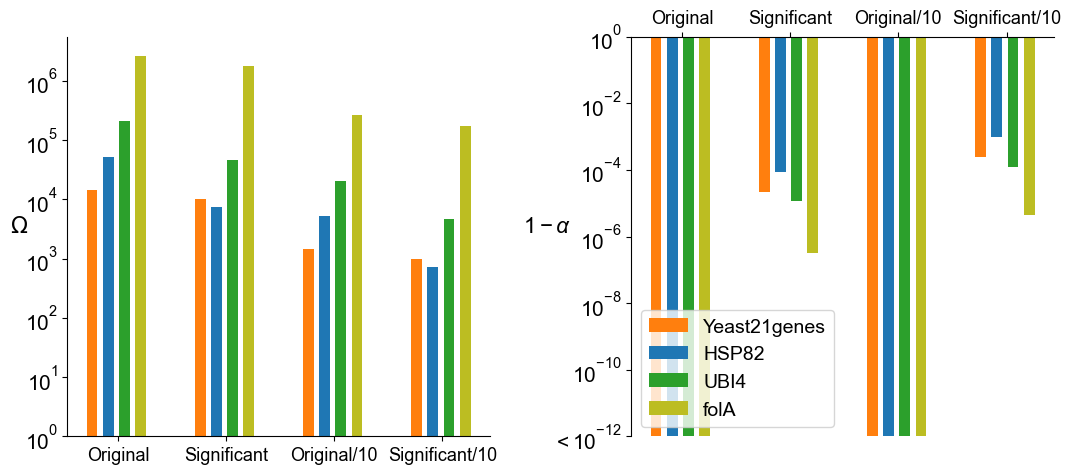

In [5]:
# Plot Figure 1bc

# Select Ne=1e7
omega_dict = omega_Ne_dict['1e+07']
alpha_dict = alpha_Ne_dict['1e+07']

fig,axes = plt.subplots(1, 2, figsize=[11, 5],facecolor='w')
color_list = ['C1','C0','C2','C8']

ax1, ax2 = axes

# Left panel: Omega
# For plot indices [0, 1, 5, 6]:
#   0: raw Omega
#   1: non-significant mutations set to neutral ("Significant")
#   5: beneficial mutations downsampled raw Omega
#   6: downsampled & "Significant"
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(omega_dict[key_gene][key_env])[[0, 1, 5, 6]]
    ax1.bar(
        np.array([0, 1, 2, 3])+j*0.15,
        np.log10(item), # log10 scaled
        width=0.1, color=color_list[j], label=key
    )
    j += 1
ax1.set_xticks(np.array([0, 1, 2, 3]) + 0.24)
ax1.set_xticklabels(
    ['Original', 'Significant', 'Original/10', 'Significant/10'],
    fontsize=13
)

ax1.set_ylabel(r"$\it{\Omega}$", rotation=0, fontsize=16)
ax1.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax1.set_yticklabels(['$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$', '$10^{5}$', '$10^{6}$'])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

# Right panel: 1-α
# plot 1-α becaue α can be very close to 1
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(alpha_dict[key_gene][key_env])[[0, 1, 5, 6]]
    ax2.bar(
        np.array([0, 1, 2, 3]) + j * 0.15,
        np.log10(np.array(item) + 1e-20),
        width=0.1, color=color_list[j], label=key
    )
    j += 1

ax2.set_xticks(np.array([0, 1, 2, 3]) + 0.24)
ax2.xaxis.set_ticks_position('top') 
ax2.set_xticklabels(
    ['Original', 'Significant', 'Original/10', 'Significant/10'],
    fontsize=13
)
ax2.set_ylabel(r"$1-\it{\alpha}$",rotation=0,fontsize=16)
ax2.legend(fontsize=14)
ax2.set_ylim(-12, 0) # log10 scale from 1e-12 to 1
ax2.set_yticks([-12, -10, -8, -6, -4, -2, 0])
ax2.set_yticklabels(['$<10^{-12}$', '$10^{-10}$', '$10^{-8}$', '$10^{-6}$', '$10^{-4}$', '$10^{-2}$', '$10^{0}$'])
ax2.spines.right.set_visible(False)
ax2.spines.bottom.set_visible(False)

plt.tight_layout()
#plt.savefig('../Figures/Fig1bc.pdf')

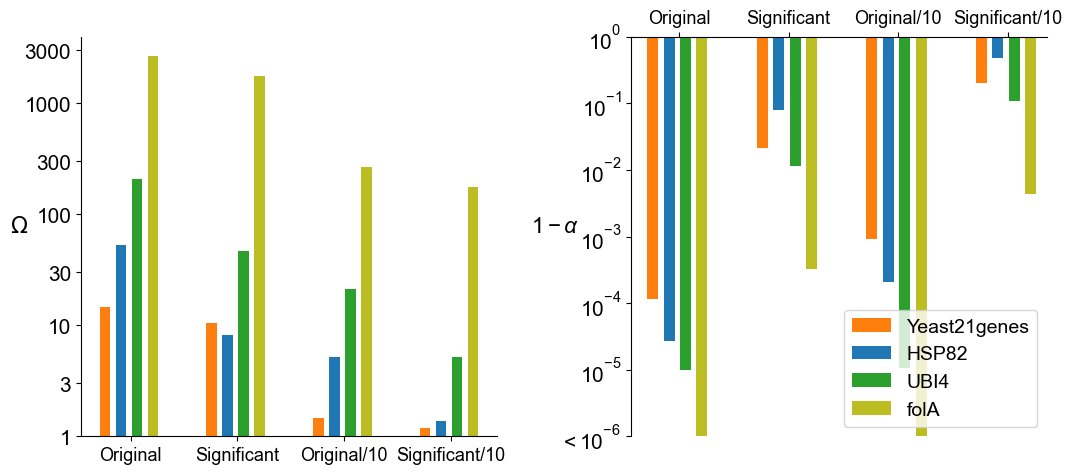

In [6]:
# Figure S1fg

# Smaller effective population size Ne = 1e4
omega_dict = omega_Ne_dict['1e+04']
alpha_dict = alpha_Ne_dict['1e+04']

fig,axes = plt.subplots(1,2,figsize=[11,5],facecolor='w')
color_list = ['C1','C0','C2','C8']

ax1, ax2 = axes
# Left panel: Omega
# For plot indices [0, 1, 5, 6]:
#   0: raw Omega
#   1: non-significant mutations set to neutral ("Significant")
#   5: beneficial mutations downsampled raw Omega
#   6: downsampled & "Significant"
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(omega_dict[key_gene][key_env])[[0, 1, 5, 6]]
    ax1.bar(
        np.array([0, 1, 2, 3]) + j * 0.15,
        np.log10(item),
        width=0.1, color=color_list[j], label=key
    )
    j += 1
ax1.set_xticks([0+0.24, 1+0.24, 2+0.24, 3+0.24])
ax1.set_xticklabels(['Original', 'Significant', 'Original/10', 'Significant/10'], fontsize=13)
ax1.set_ylabel(r"$\it{\Omega}$", rotation=0, fontsize=16)

# Custom y-axis labels mixing integers and powers for readability at Ne=1e4
ax1.set_yticks([0, np.log10(3), 1, np.log10(30), 2, np.log10(300), 3, np.log10(3000)])
ax1.set_yticklabels([1, 3, 10, 30, 100, 300, 1000, 3000])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

# Right panel: 1-α
# plot 1-α becaue α can be very close to 1
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(alpha_dict[key_gene][key_env])[[0, 1, 5, 6]]
    ax2.bar(
        np.array([0, 1, 2, 3]) + j * 0.15,
        np.log10(np.array(item) + 1e-20),
        width=0.1, color=color_list[j], label=key
    )
    j += 1

ax2.xaxis.set_ticks_position('top') 
ax2.set_xticks([0+0.24, 1+0.24, 2+0.24, 3+0.24])
ax2.set_xticklabels(['Original', 'Significant', 'Original/10', 'Significant/10'], fontsize=13)
ax2.set_ylabel(r"$1-\it{\alpha}$", rotation=0, fontsize=16)
ax2.legend(fontsize=14)
ax2.set_ylim(-6, 0)
ax2.set_xlim(-0.2, 3.6)
ax2.set_yticks([-6, -5, -4, -3, -2, -1, 0])
ax2.set_yticklabels(
    ['$<10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$']
)
ax2.spines.right.set_visible(False)
ax2.spines.bottom.set_visible(False)

plt.tight_layout()
#plt.savefig('../Figures/FigS1fg.pdf')

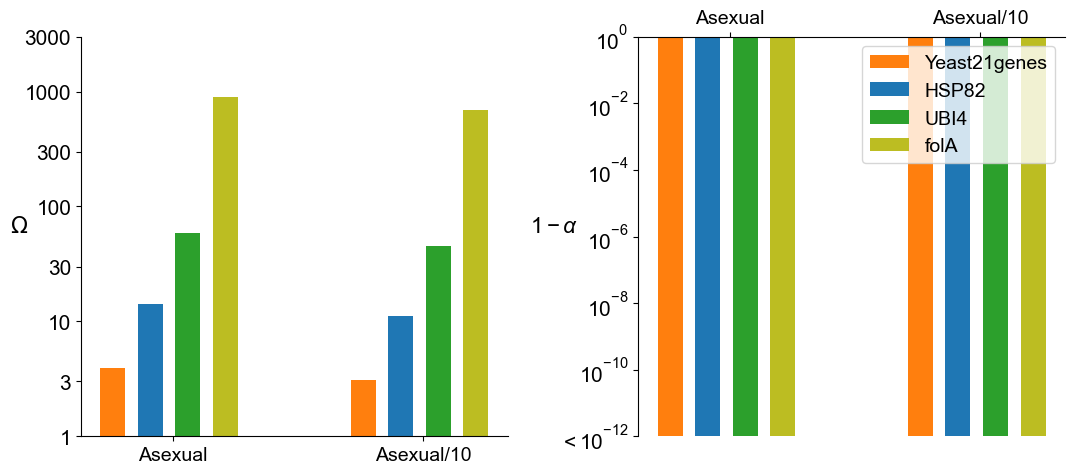

In [7]:
# Figure S1de

# Ne = 1e7, clonal interference adjusted (asexual) estimates
# For plot indices [4, 7]:
#   4: asexual (CI) estimate
#   7: asexual & downsampled
omega_dict = omega_Ne_dict['1e+07']
alpha_dict = alpha_Ne_dict['1e+07']

fig,axes = plt.subplots(1, 2, figsize=[11, 5], facecolor='w')
color_list = ['C1', 'C0', 'C2', 'C8']

ax1, ax2 = axes

# Left panel: Omega (same four variants as above)
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(omega_dict[key_gene][key_env])[[4, 7]]
    ax1.bar(
        np.array([0, 1]) + j * 0.15,
        np.log10(item),
        width=0.1, color=color_list[j], label=key
    )
    j += 1
ax1.set_xticks([0+0.24, 1+0.24])
ax1.set_xticklabels(['Asexual', 'Asexual/10'], fontsize=14)
ax1.set_ylabel(r"$\it{\Omega}$", rotation=0, fontsize=16)
ax1.set_yticks([0, np.log10(3), 1, np.log10(30), 2,np.log10(300), 3, np.log10(3000)])
ax1.set_yticklabels([1, 3, 10, 30, 100, 300, 1000, 3000])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

# Right panel: 1-α
# plot 1-α becaue α can be very close to 1
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(alpha_dict[key_gene][key_env])[[4, 7]]
    ax2.bar(
        np.array([0, 1]) + j * 0.15,
        np.log10(np.array(item) + 1e-20),
        width=0.1,color=color_list[j],label=key
    )
    j += 1

ax2.xaxis.set_ticks_position('top')
ax2.set_xticks([0+0.24, 1+0.24])
ax2.set_xticklabels(['Asexual', 'Asexual/10'], fontsize=14)
ax2.set_ylabel(r"$1-\it{\alpha}$", rotation=0, fontsize=16)
ax2.legend(fontsize=14)
ax2.set_ylim(-12, 0)
ax2.set_yticks([-12, -10, -8, -6, -4, -2, 0])
ax2.set_yticklabels(['$<10^{-12}$', '$10^{-10}$', '$10^{-8}$', '$10^{-6}$', '$10^{-4}$', '$10^{-2}$', '$10^{0}$'])
ax2.spines.right.set_visible(False)
ax2.spines.bottom.set_visible(False)

plt.tight_layout()
#plt.savefig('../Figures/FigS1de.pdf')

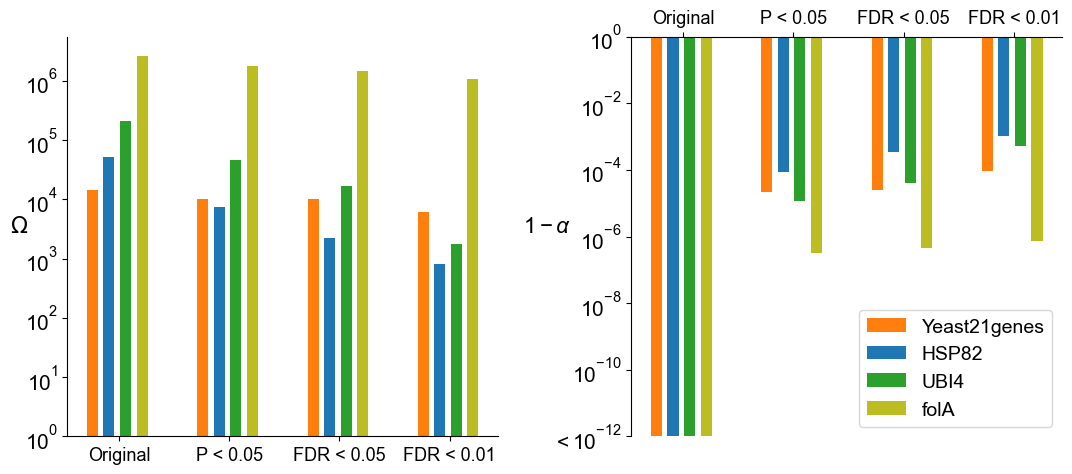

In [8]:
# Figure S1bc

# Ne = 1e7, with different statistical significance cutoffs 
# For plot indices [0, 1, 2, 3]:
#   0: no statistical significance requirement
#   1: P < 0.05
#   2: q-value < 0.05
#   3: q-value < 0.01

omega_dict = omega_Ne_dict['1e+07']
alpha_dict = alpha_Ne_dict['1e+07']

fig,axes = plt.subplots(1, 2, figsize=[11, 5], facecolor='w')
color_list = ['C1', 'C0', 'C2', 'C8']

ax1, ax2 = axes

# Left panel: Omega (same four variants as above)
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(omega_dict[key_gene][key_env])[[0, 1, 2, 3]]
    ax1.bar(
        np.array([0, 1, 2, 3]) + j * 0.15,
        np.log10(item),
        width=0.1, color=color_list[j], label=key
    )
    j+=1
ax1.set_xticks(np.array([0, 1, 2, 3]) + 0.24)
ax1.set_xticklabels(
    ['Original', 'P < 0.05','FDR < 0.05','FDR < 0.01'],
    fontsize=13
)
ax1.set_ylabel(r"$\it{\Omega}$", rotation=0, fontsize=16)
ax1.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax1.set_yticklabels(['$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$', '$10^{5}$', '$10^{6}$'])
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

# Right panel: 1-α
# plot 1-α becaue α can be very close to 1
j = 0
for key_gene, key_env in key_pair_list:
    key = key_gene
    item = np.array(alpha_dict[key_gene][key_env])[[0, 1, 2, 3]]
    ax2.bar(
        np.array([0, 1, 2, 3]) + j * 0.15,
        np.log10(np.array(item) + 1e-20),
        width=0.1, color=color_list[j], label=key
    )
    j+=1

ax2.set_xticks(np.array([0, 1, 2, 3]) + 0.24)
ax2.xaxis.set_ticks_position('top') 
ax2.set_xticklabels(
    ['Original', 'P < 0.05', 'FDR < 0.05', 'FDR < 0.01'],
    fontsize=13
)
ax2.set_ylabel(r"$1-\it{\alpha}$", rotation=0, fontsize=16)
ax2.legend(fontsize=14)
ax2.set_ylim(-12, 0)
ax2.set_yticks([-12, -10, -8, -6, -4, -2, 0])
ax2.set_yticklabels(['$<10^{-12}$', '$10^{-10}$', '$10^{-8}$', '$10^{-6}$', '$10^{-4}$', '$10^{-2}$', '$10^{0}$'])
ax2.spines.right.set_visible(False)
ax2.spines.bottom.set_visible(False)

plt.tight_layout()
#plt.savefig('../Figures/FigS1bc.pdf')